In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import sys
import os
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from lat_cb.signal import CMB, Foreground, Noise, LATsky

In [3]:
lib = '/Users/antoidicherianlonappan/Workspace/scratch'

In [4]:
cmb = CMB(lib,512,0.35)

In [5]:
E,B = hp.map2alm_spin(cmb.get_cb_lensed_QU(0),2)

setting the output map dtype to [dtype('float64'), dtype('float64')]


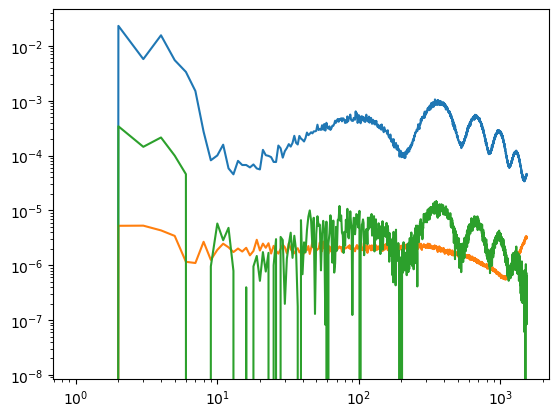

In [6]:
plt.loglog(hp.alm2cl(E),label='E')
plt.loglog(hp.alm2cl(B),label='B')
plt.loglog(hp.alm2cl(E,B),label='EB')

In [7]:
cmb.get_cb_lensed_QU(0)

array([[-1.31336035,  2.53329193, -2.83637007, ...,  4.21422277,
        -1.63937702,  9.5678084 ],
       [-7.77211178,  3.65136053, -1.32354458, ..., -6.04121797,
         7.76355261, -1.9749157 ]])

In [4]:
freqs = LATsky.freqs
nlev_p = LATsky.nlevp

In [5]:
fg = Foreground(lib,512,1,1)

In [6]:
for f in freqs:
    q = fg.dustQU(f)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
for f in freqs:
    q = fg.syncQU(f)

In [8]:
n = Noise(512)

In [21]:
nc = n.noiseQU(nlev_p[0])

In [9]:
beta = [0.1,0.1,0.8,0.8,1.2,1.2]

In [16]:
lat = LATsky(lib,512,0.35,1,1,beta)

In [14]:
lat.config

{27: {'fwhm': 7.4, 'nlevp': 71, 'beta': 0.1},
 39: {'fwhm': 5.1, 'nlevp': 36, 'beta': 0.1},
 93: {'fwhm': 2.2, 'nlevp': 8, 'beta': 0.8},
 145: {'fwhm': 1.4, 'nlevp': 10, 'beta': 0.8},
 225: {'fwhm': 1.0, 'nlevp': 22, 'beta': 1.2},
 280: {'fwhm': 0.9, 'nlevp': 54, 'beta': 1.2}}

In [12]:
for f in LATsky.freqs:
    q = lat.obsQU(1,f)

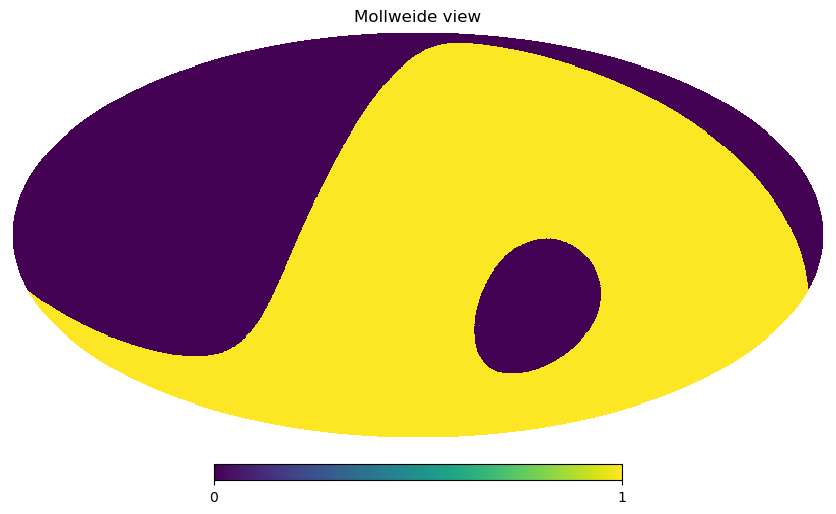

In [17]:
hp.mollview(lat.mask)

In [81]:
LATsky.freqs

array([ 27,  39,  93, 145, 225, 280])

In [18]:
np.mean(lat.mask)

0.6000019709269205